<a href="https://colab.research.google.com/github/MariaMoraru/Dissertation/blob/main/KNeighbours%2Ble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Airlines.csv to Airlines.csv


In [4]:
mydata = pd.read_csv('Airlines.csv')

In [ ]:
mydata.shape

(539383, 9)

In [5]:
#create a dataframe with all training data except the target column
X = mydata.drop(columns=['id', 'Airline','AirportFrom','AirportTo','Delay'])

#check that the target variable has been removed
X.head()

,Flight,DayOfWeek,Time,Length
0,269,3,15,205
1,1558,3,15,222
2,2400,3,20,165
3,2466,3,20,195
4,108,3,30,202


In [6]:
#separate target values
y = mydata['Delay'].values

#view target values
y[0:5]

array([1, 1, 1, 1, 0])

In [7]:
mydata.isnull().values.any()

False

In [8]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [9]:
X_train

,Flight,DayOfWeek,Time,Length
131753,6289,3,944,60
178735,135,6,610,90
290423,1693,5,1040,175
104165,2956,2,390,324
325078,465,7,1086,252
...,...,...,...,...
370333,1419,3,580,370
18738,250,4,390,55
502164,6545,3,1110,125
387912,6981,4,526,57


In [10]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#show model predictions on the test data
knn.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6414805750994188

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
#predicting the test set results
y_pred = knn.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
#making confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)   #prints the accuracy score

0.6414805750994188

In [ ]:
confusion_matrix(y_test, y_pred)

array([[42478, 17346],
       [21330, 26723]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69     59824
           1       0.61      0.56      0.58     48053

    accuracy                           0.64    107877
   macro avg       0.64      0.63      0.63    107877
weighted avg       0.64      0.64      0.64    107877



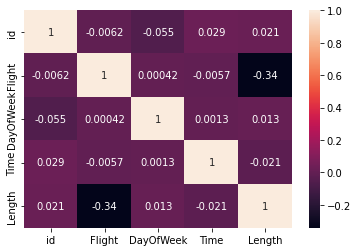

In [ ]:
sns.heatmap(X.corr(), annot = True)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [16]:
#create ndarray for label encoding (sklearn)
Airline = mydata.iloc[:,1:2].values

## le for Airline
le = LabelEncoder()
Airline[:,0] = le.fit_transform(Airline[:,0])
Airline = pd.DataFrame(Airline)
Airline.columns = ['Airline']
le_Airline_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for Airline:") 
print(le_Airline_mapping)
print(Airline[:18])

Sklearn label encoder results for Airline:
{'9E': 0, 'AA': 1, 'AS': 2, 'B6': 3, 'CO': 4, 'DL': 5, 'EV': 6, 'F9': 7, 'FL': 8, 'HA': 9, 'MQ': 10, 'OH': 11, 'OO': 12, 'UA': 13, 'US': 14, 'WN': 15, 'XE': 16, 'YV': 17}
   Airline
0        4
1       14
2        1
3        1
4        2
5        4
6        5
7        5
8        5
9        1
10       4
11       5
12       5
13       1
14       2
15      14
16       3
17       4


In [17]:
a = mydata['AirportFrom'].unique()
print(len(a))
a[:10]

293


array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN'], dtype=object)

In [18]:
#create ndarray for label encodoing (sklearn)
AirportFrom = mydata.iloc[:,3:4].values

## le for AirportFrom
le = LabelEncoder()
AirportFrom[:,0] = le.fit_transform(AirportFrom[:,0])
AirportFrom = pd.DataFrame(AirportFrom)
AirportFrom.columns = ['AirportFrom']
le_AirportFrom_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for AirportFrom:") 
print(le_AirportFrom_mapping)
print(AirportFrom[:10])

Sklearn label encoder results for AirportFrom:
{'ABE': 0, 'ABI': 1, 'ABQ': 2, 'ABR': 3, 'ABY': 4, 'ACT': 5, 'ACV': 6, 'ACY': 7, 'ADK': 8, 'ADQ': 9, 'AEX': 10, 'AGS': 11, 'ALB': 12, 'AMA': 13, 'ANC': 14, 'ASE': 15, 'ATL': 16, 'ATW': 17, 'AUS': 18, 'AVL': 19, 'AVP': 20, 'AZO': 21, 'BDL': 22, 'BET': 23, 'BFL': 24, 'BGM': 25, 'BGR': 26, 'BHM': 27, 'BIL': 28, 'BIS': 29, 'BKG': 30, 'BLI': 31, 'BMI': 32, 'BNA': 33, 'BOI': 34, 'BOS': 35, 'BQK': 36, 'BQN': 37, 'BRO': 38, 'BRW': 39, 'BTM': 40, 'BTR': 41, 'BTV': 42, 'BUF': 43, 'BUR': 44, 'BWI': 45, 'BZN': 46, 'CAE': 47, 'CAK': 48, 'CDC': 49, 'CDV': 50, 'CEC': 51, 'CHA': 52, 'CHO': 53, 'CHS': 54, 'CIC': 55, 'CID': 56, 'CLD': 57, 'CLE': 58, 'CLL': 59, 'CLT': 60, 'CMH': 61, 'CMI': 62, 'CMX': 63, 'COD': 64, 'COS': 65, 'COU': 66, 'CPR': 67, 'CRP': 68, 'CRW': 69, 'CSG': 70, 'CVG': 71, 'CWA': 72, 'CYS': 73, 'DAB': 74, 'DAL': 75, 'DAY': 76, 'DBQ': 77, 'DCA': 78, 'DEN': 79, 'DFW': 80, 'DHN': 81, 'DLH': 82, 'DRO': 83, 'DSM': 84, 'DTW': 85, 'EAU': 86, 'ECP'

In [ ]:
a = mydata['AirportTo'].unique()
print(len(a))

293


In [19]:
#create ndarray for label encodoing (sklearn)
AirportTo = mydata.iloc[:,4:5].values
## le for AirportTo
le = LabelEncoder()
AirportTo[:,0] = le.fit_transform(AirportTo[:,0])
AirportTo = pd.DataFrame(AirportTo)
AirportTo.columns = ['AirportTo']
le_AirportTo_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for AirportTo:") 
print(le_AirportTo_mapping)
print(AirportTo[:10])

Sklearn label encoder results for AirportTo:
{'ABE': 0, 'ABI': 1, 'ABQ': 2, 'ABR': 3, 'ABY': 4, 'ACT': 5, 'ACV': 6, 'ACY': 7, 'ADK': 8, 'ADQ': 9, 'AEX': 10, 'AGS': 11, 'ALB': 12, 'AMA': 13, 'ANC': 14, 'ASE': 15, 'ATL': 16, 'ATW': 17, 'AUS': 18, 'AVL': 19, 'AVP': 20, 'AZO': 21, 'BDL': 22, 'BET': 23, 'BFL': 24, 'BGM': 25, 'BGR': 26, 'BHM': 27, 'BIL': 28, 'BIS': 29, 'BKG': 30, 'BLI': 31, 'BMI': 32, 'BNA': 33, 'BOI': 34, 'BOS': 35, 'BQK': 36, 'BQN': 37, 'BRO': 38, 'BRW': 39, 'BTM': 40, 'BTR': 41, 'BTV': 42, 'BUF': 43, 'BUR': 44, 'BWI': 45, 'BZN': 46, 'CAE': 47, 'CAK': 48, 'CDC': 49, 'CDV': 50, 'CEC': 51, 'CHA': 52, 'CHO': 53, 'CHS': 54, 'CIC': 55, 'CID': 56, 'CLD': 57, 'CLE': 58, 'CLL': 59, 'CLT': 60, 'CMH': 61, 'CMI': 62, 'CMX': 63, 'COD': 64, 'COS': 65, 'COU': 66, 'CPR': 67, 'CRP': 68, 'CRW': 69, 'CSG': 70, 'CVG': 71, 'CWA': 72, 'CYS': 73, 'DAB': 74, 'DAL': 75, 'DAY': 76, 'DBQ': 77, 'DCA': 78, 'DEN': 79, 'DFW': 80, 'DHN': 81, 'DLH': 82, 'DRO': 83, 'DSM': 84, 'DTW': 85, 'EAU': 86, 'ECP': 

In [ ]:
from sklearn.linear_model import LogisticRegression   #imports the LogisticRegression class from the linear_module of the sklearn library
model = LogisticRegression()   #creates an object of the LogisticRegression class and names is model
model.fit(X_train, y_train)   #uses the created object to fit a Logisitc Regression model on the training data

LogisticRegression()